In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [42]:
d=pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\Real estate.csv")
d.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
d.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [44]:
d.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [45]:
d.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

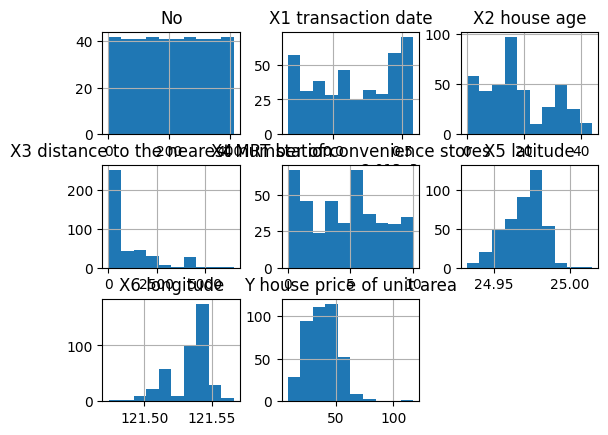

In [46]:
d.hist()

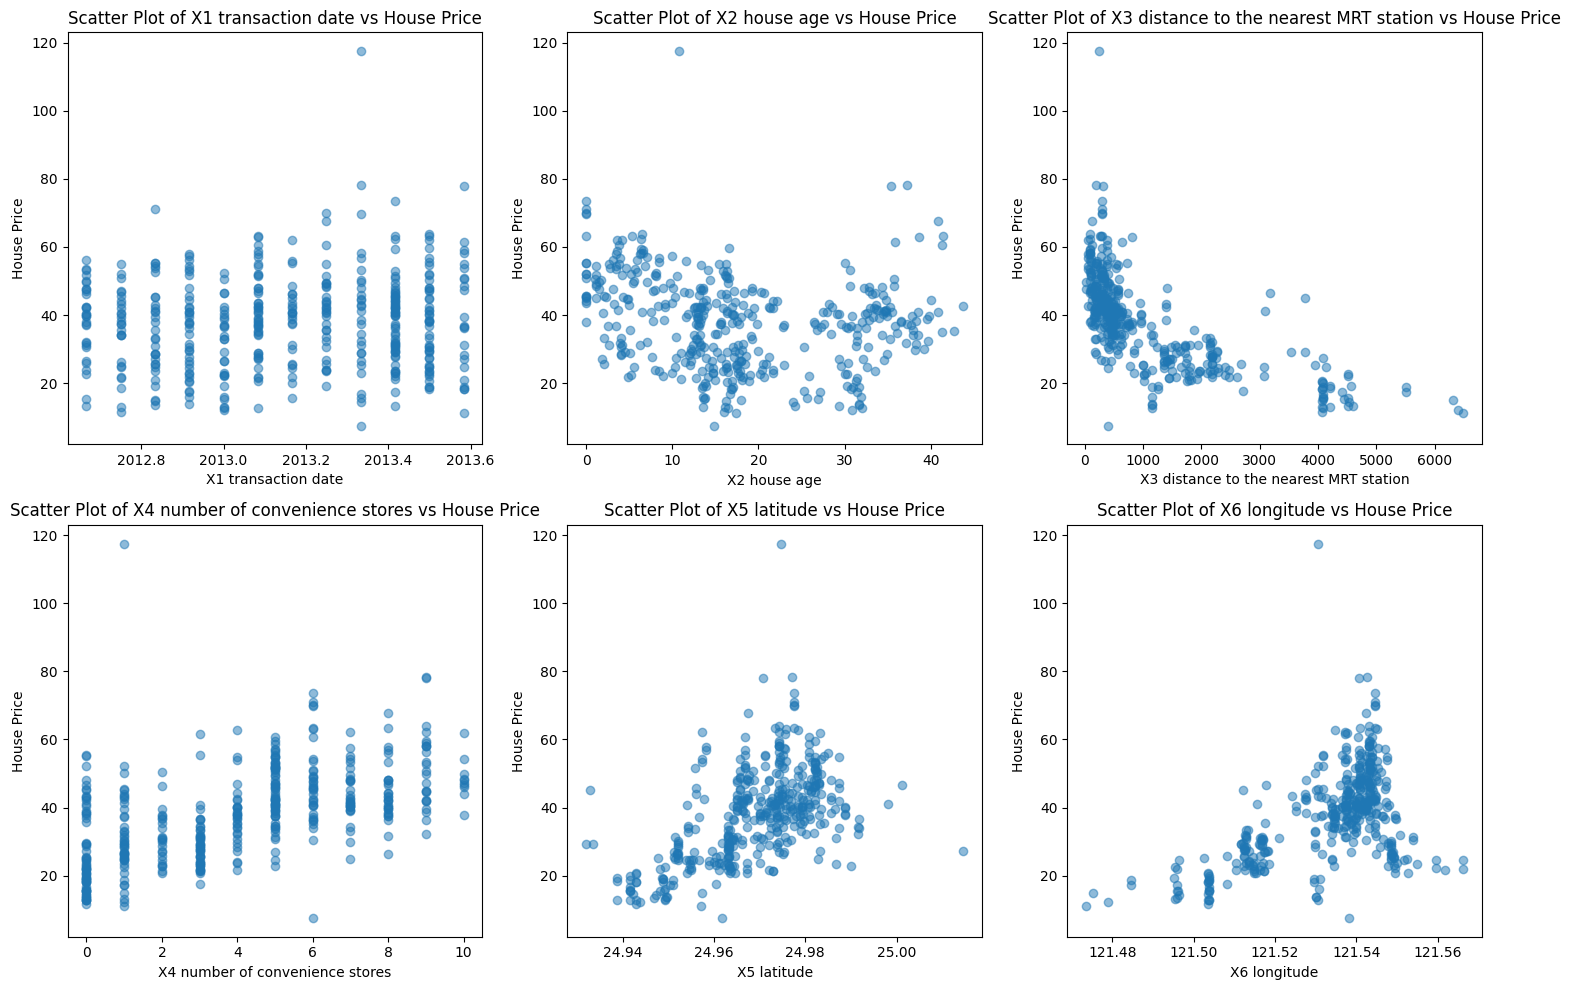

In [47]:
import matplotlib.pyplot as plt


X = d[['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].to_numpy()
y = d[['Y house price of unit area']].to_numpy()

feature_names = ['X1 transaction date', 'X2 house age', 
                  'X3 distance to the nearest MRT station', 
                  'X4 number of convenience stores', 
                  'X5 latitude', 'X6 longitude']

plt.figure(figsize=(15, 10))

for i, feature_name in enumerate(feature_names):
    plt.subplot(2, 3, i + 1)  
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'Scatter Plot of {feature_name} vs House Price')
    plt.xlabel(feature_name)
    plt.ylabel('House Price')
    
plt.tight_layout()
plt.show()


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)


In [49]:
X = d[[ 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       ]].to_numpy()
y = d[['Y house price of unit area']].to_numpy()

In [50]:
y_train.shape

(277, 1)

In [51]:
X_test.shape

(137, 6)

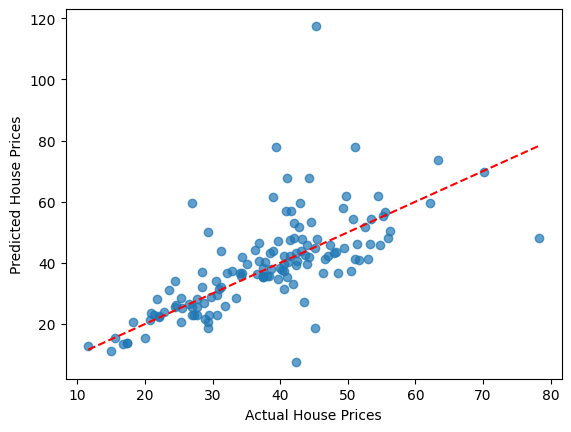

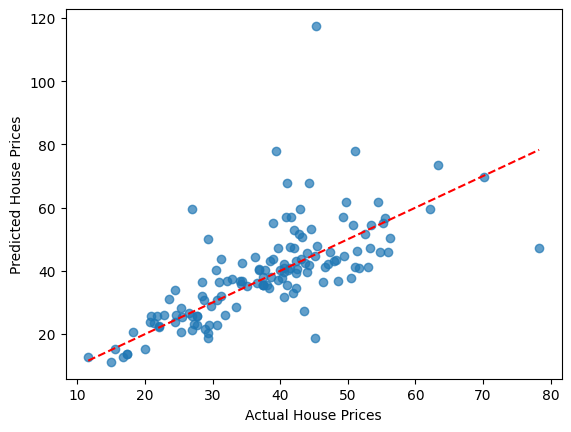

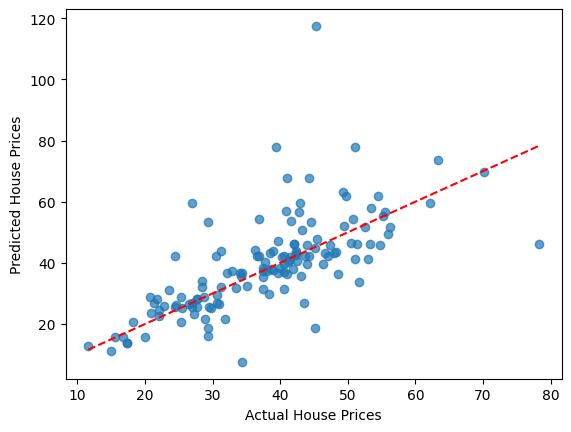

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
criterion_list = ["squared_error", "friedman_mse", "absolute_error"]
max_depth_list = [100]

for criterion in criterion_list:
    for max_depth in max_depth_list:
        dt_model = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, random_state=42)
        dt_model.fit(X_train, y_train)
        predictions = dt_model.predict(X_test)
        
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)
        


        
        plt.scatter(y_test, predictions, alpha=0.7)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
        plt.xlabel('Actual House Prices')
        plt.ylabel('Predicted House Prices')
        plt.show()

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


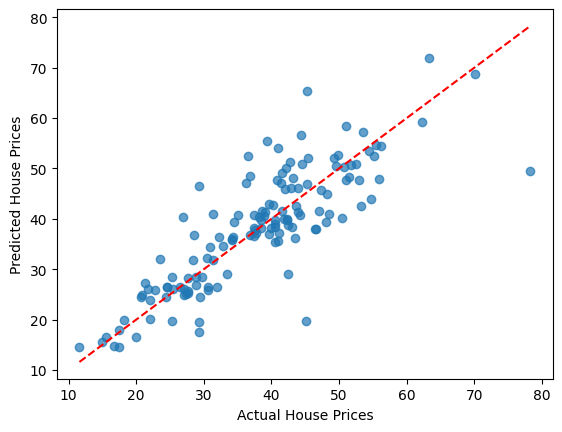

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


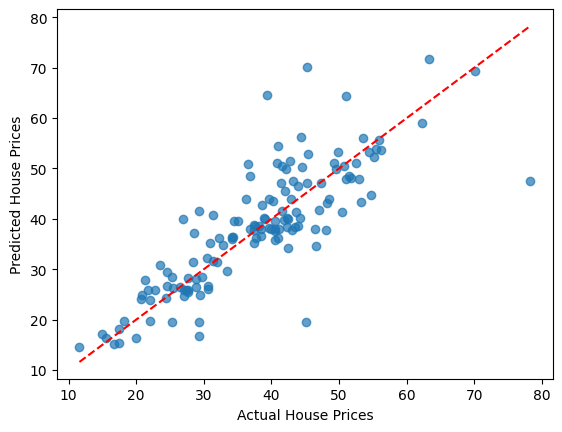

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


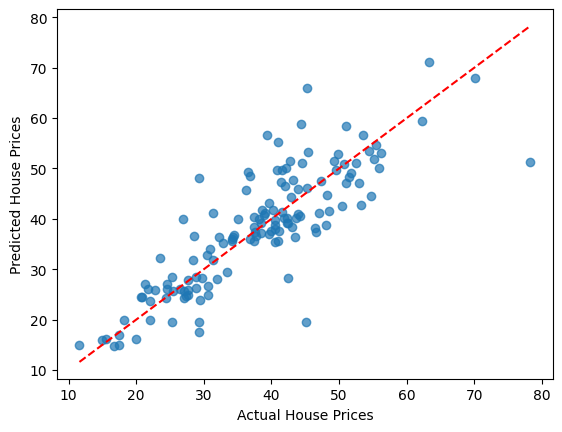

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


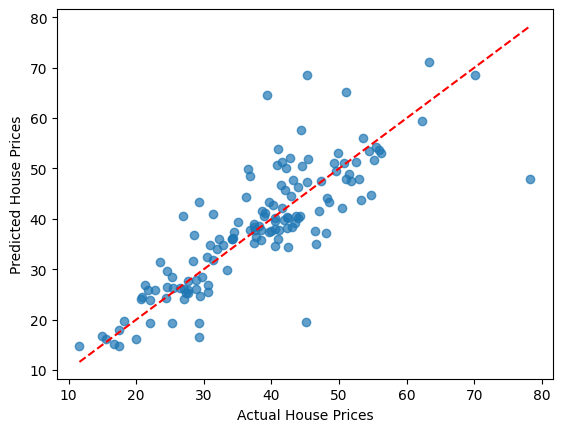

In [53]:
from sklearn.ensemble import RandomForestRegressor
n_estimators_list = [50, 100]
criterion_list = ["squared_error", "absolute_error"]
max_depth_list = [None]

for n_estimators in n_estimators_list:
    for criterion in criterion_list:
            rf_model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, random_state=10).fit(X_train, y_train)
            predictions = rf_model.predict(X_test)
            
            mae = mean_absolute_error(y_test, predictions)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            r2 = r2_score(y_test, predictions)
            
       
            
            plt.scatter(y_test, predictions, alpha=0.7)
            plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
            plt.xlabel('Actual House Prices')
            plt.ylabel('Predicted House Prices')
            plt.show()

In [54]:

y = tree_model.predict(X_test)
print(y)

NameError: name 'tree_model' is not defined